In [1]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data_path = './Data_Ankle.mat'
data_mat = loadmat(data_path)

In [3]:
data_matrix = data_mat['ankle_data']
data_matrix.shape

(48000, 6)

In [4]:
columns = ['Time', 'Vertical Ground_Reaction_Force', 'Hip_Angle', 'Knee_Angle', 'Ankle_Angle', 'Ankle_Moment']
data_df = pd.DataFrame(data_matrix, columns=columns)
missing_values = data_df.isnull().sum()
data_df.head(), missing_values

(   Time  Vertical Ground_Reaction_Force  Hip_Angle  Knee_Angle  Ankle_Angle  \
 0  0.00                       10.748116   0.292974    0.825063    -1.492588   
 1  0.01                        8.231421   0.293179    0.822469    -1.493192   
 2  0.02                        6.204634   0.294008    0.810997    -1.495867   
 3  0.03                        5.083716   0.295568    0.785731    -1.501793   
 4  0.04                        4.816681   0.297472    0.745707    -1.511208   
 
    Ankle_Moment  
 0     -1.926491  
 1     -1.984065  
 2     -1.921029  
 3     -1.727272  
 4     -1.440258  ,
 Time                              0
 Vertical Ground_Reaction_Force    0
 Hip_Angle                         0
 Knee_Angle                        0
 Ankle_Angle                       0
 Ankle_Moment                      0
 dtype: int64)

In [5]:
summary_stats = data_df.describe()

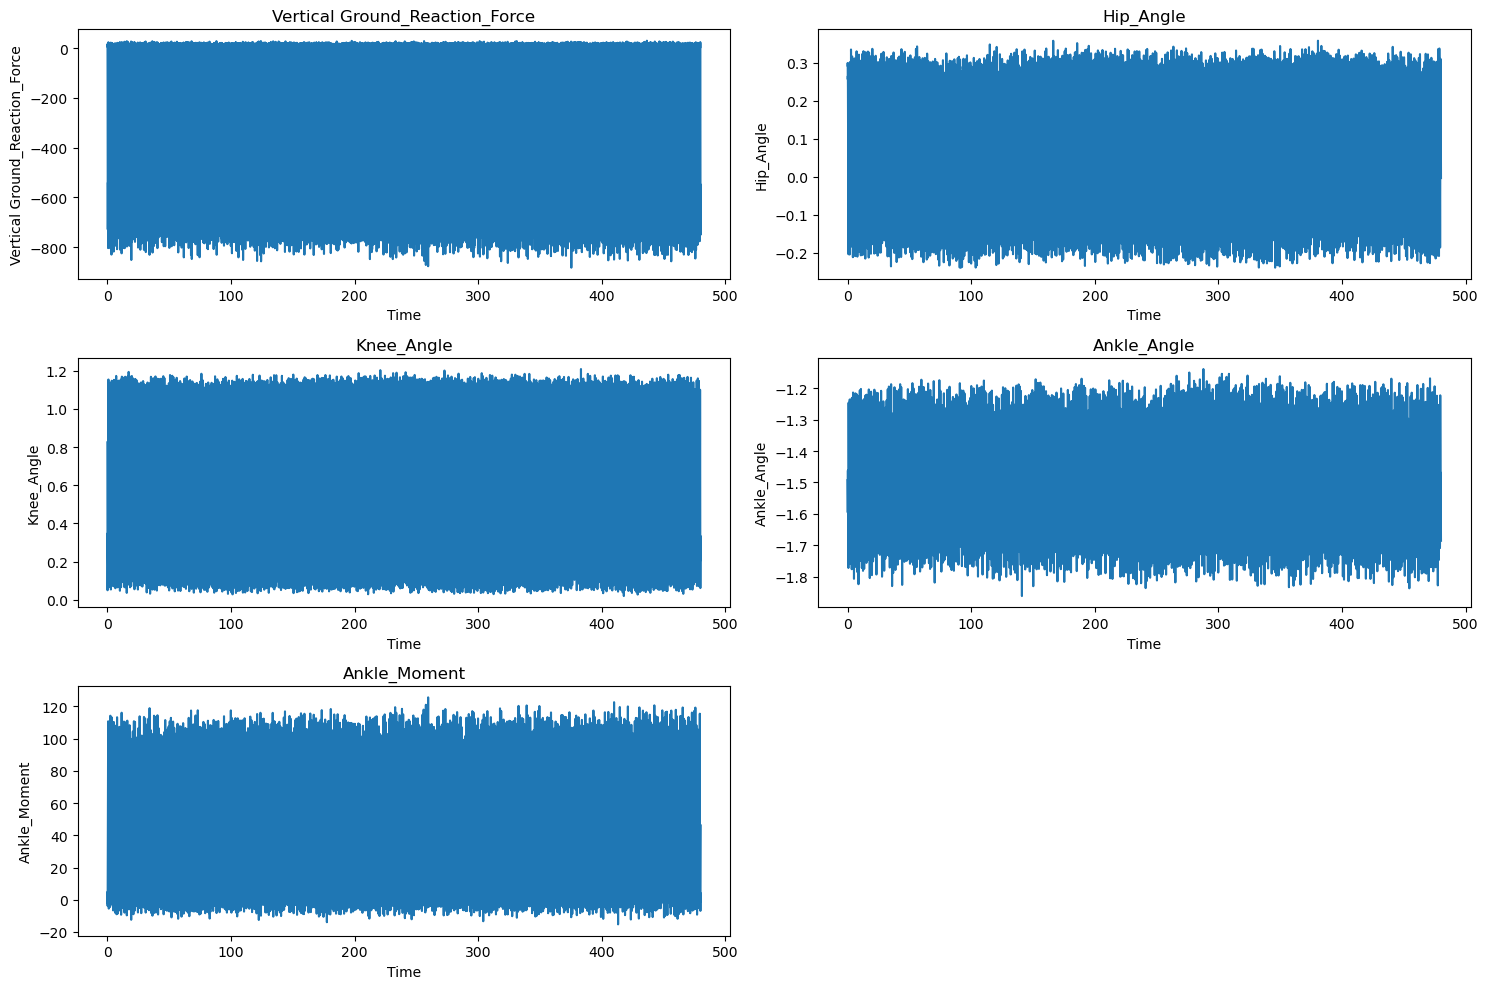

In [6]:
plt.figure(figsize=(15, 10))
for idx, col in enumerate(columns[1:], 1):
    plt.subplot(3, 2, idx)
    plt.plot(data_df['Time'], data_df[col])
    plt.title(col)
    plt.xlabel('Time')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

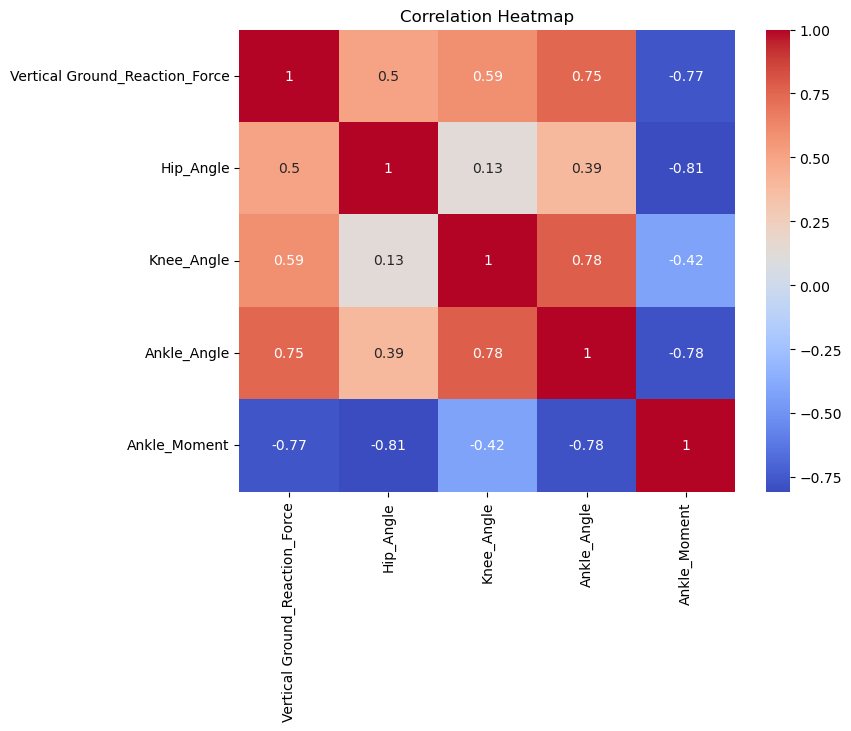

In [7]:
correlation_matrix = data_df.iloc[:, 1:].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

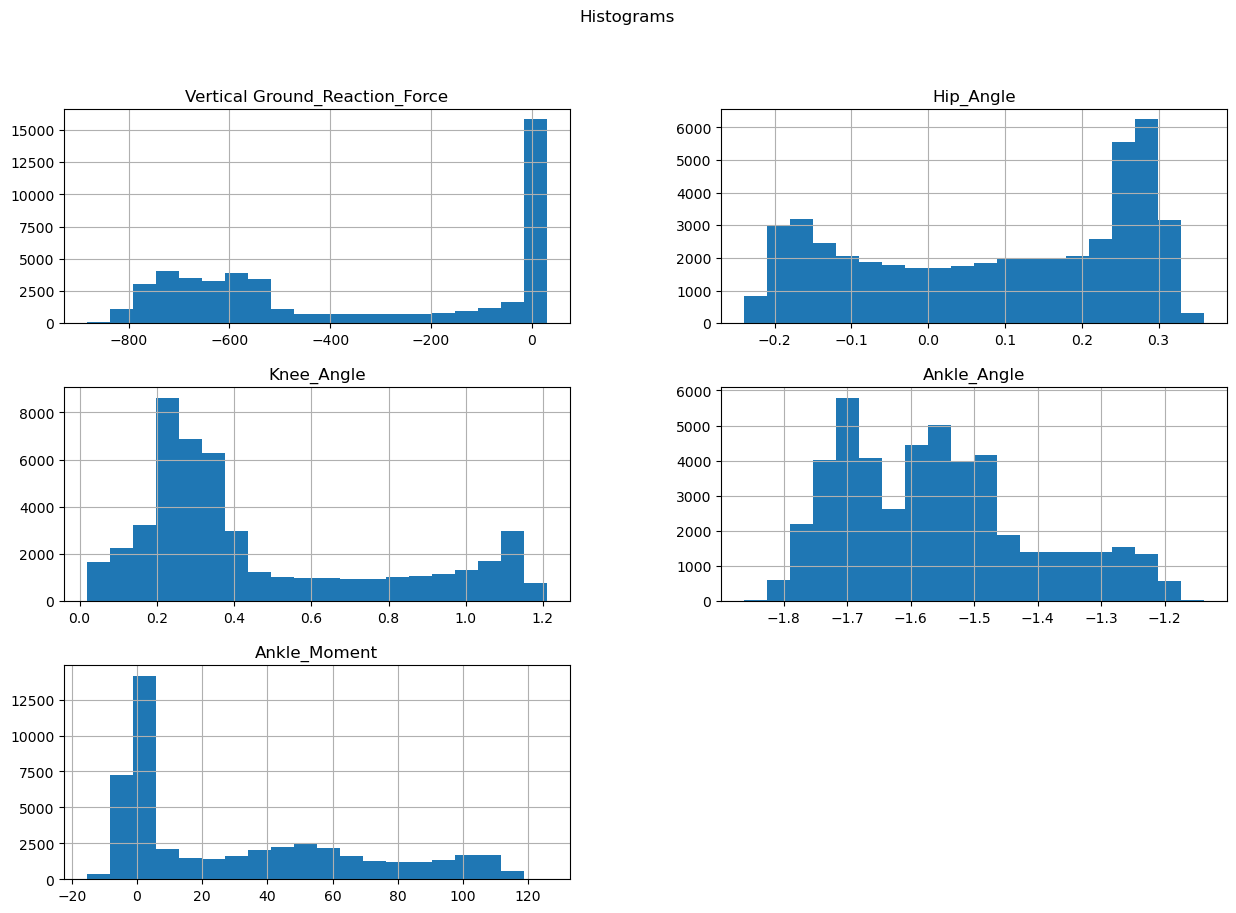

In [8]:
data_df.iloc[:, 1:].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms')
plt.show()

In [12]:
summary_stats

,Time,Vertical Ground_Reaction_Force,Hip_Angle,Knee_Angle,Ankle_Angle,Ankle_Moment
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,239.995000,-354.716583,0.087569,0.461276,-1.557203,31.319840
std,138.565508,313.863159,0.176258,0.325162,0.151105,36.772324
min,0.000000,-882.750438,-0.239775,0.019355,-1.862011,-15.297143
25%,119.997500,-651.842022,-0.082198,0.230068,-1.685668,0.397057
50%,239.995000,-436.473239,0.117106,0.328396,-1.571418,13.380303
75%,359.992500,3.639476,0.258930,0.670041,-1.474308,57.695821
max,479.990000,29.438511,0.358529,1.209329,-1.138431,125.665556


In [9]:
data_to_scale = data_df.drop(columns=['Time'])

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

In [11]:
scaled_df = pd.DataFrame(scaled_data, columns=columns[1:])
scaled_df['Time'] = data_df['Time']

In [12]:
train_size = int(0.8 * len(scaled_df))
train_data = scaled_df[:train_size]
test_data = scaled_df[train_size:]

In [13]:
train_data

,Vertical Ground_Reaction_Force,Hip_Angle,Knee_Angle,Ankle_Angle,Ankle_Moment,Time
0,1.164420,1.165376,1.118800,0.427622,-0.904122,0.00
1,1.156401,1.166540,1.110820,0.423625,-0.905688,0.01
2,1.149944,1.171241,1.075539,0.405926,-0.903974,0.02
3,1.146372,1.180092,0.997836,0.366702,-0.898705,0.03
4,1.145522,1.190897,0.874748,0.304399,-0.890899,0.04
...,...,...,...,...,...,...
38395,0.745858,-1.235113,0.651326,0.736567,-0.351978,383.95
38396,0.895353,-1.105113,0.839931,1.080455,-0.569171,383.96
38397,1.008179,-0.957517,1.032696,1.384518,-0.730013,383.97
38398,1.087433,-0.796470,1.223985,1.627290,-0.837842,383.98


In [14]:
X_train_1 = train_data[['Ankle_Angle']].values
y_train_1 = train_data['Ankle_Moment'].values

X_test_1 = test_data[['Ankle_Angle']].values
y_test_1 = test_data['Ankle_Moment'].values

In [15]:
X_train_1_cnn = X_train_1.reshape(X_train_1.shape[0], X_train_1.shape[1], 1)
X_test_1_cnn = X_test_1.reshape(X_test_1.shape[0], X_test_1.shape[1], 1)

X_train_1_cnn.shape, X_test_1_cnn.shape, y_train_1.shape, y_test_1.shape

((38400, 1, 1), (9600, 1, 1), (38400,), (9600,))

In [22]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
model = Sequential()
model.add(Conv1D(16, kernel_size=(1,), activation="relu", input_shape=(1,1)))
#model.add(Conv2D(32, kernel_size=(2,), activation="relu"))
model.add(Flatten())
model.compile(loss="mse", optimizer="adam")
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="linear"))

In [24]:
fit = model.fit(X_train_1_cnn, y_train_1, batch_size=12, validation_split=0.2, epochs=50)

Epoch 1/50
2560/2560 [==============================] - 298s 116ms/step - loss: 0.1642 - val_loss: 0.1556
Epoch 2/50
2560/2560 [==============================] - 297s 116ms/step - loss: 0.1639 - val_loss: 0.1515
Epoch 3/50
2560/2560 [==============================] - 299s 117ms/step - loss: 0.1644 - val_loss: 0.1548
Epoch 4/50
2560/2560 [==============================] - 308s 120ms/step - loss: 0.1641 - val_loss: 0.1525
Epoch 5/50
2560/2560 [==============================] - 308s 120ms/step - loss: 0.1640 - val_loss: 0.1518
Epoch 6/50
2560/2560 [==============================] - 334s 131ms/step - loss: 0.1639 - val_loss: 0.1589
Epoch 7/50
2560/2560 [==============================] - 301s 118ms/step - loss: 0.1641 - val_loss: 0.1525
Epoch 8/50
2560/2560 [==============================] - 303s 119ms/step - loss: 0.1640 - val_loss: 0.1545
Epoch 9/50
2560/2560 [==============================] - 303s 118ms/step - loss: 0.1641 - val_loss: 0.1547
Epoch 10/50
2560/2560 [=======================

In [116]:
ypred = model.predict(X_test_1_cnn)

300/300 [==============================] - 0s 777us/step


In [117]:
loss = model.evaluate(X_test_1_cnn, y_test_1)
print("Test loss for combination 1:", loss)

300/300 [==============================] - 0s 789us/step - loss: 0.1557
Test loss for combination 1: 0.15568701922893524


In [82]:
from sklearn.metrics import r2_score
r2_score(y_test_1, ypred)

0.8408912963448043

In [16]:
def extract_data_for_combination(columns):
    X_train = train_data[columns].values
    y_train = train_data['Ankle_Moment'].values
    X_test = test_data[columns].values
    y_test = test_data['Ankle_Moment'].values
    # Reshape for RNN
    X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    return X_train_rnn, y_train, X_test_rnn, y_test

In [17]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.layers import LSTM

def create_rnn_model_for_combination(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [18]:
X_train_rnn, y_train, X_test_rnn, y_test = extract_data_for_combination(['Ankle_Angle'])
rnn_model = create_rnn_model_for_combination(input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [19]:
model = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
480/480 [==============================] - 3s 3ms/step - loss: 0.3758 - val_loss: 0.1623
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1906 - val_loss: 0.1602
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1859 - val_loss: 0.1590
Epoch 4/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1834 - val_loss: 0.1588
Epoch 5/50
480/480 [==============================] - 1s 3ms/step - loss: 0.1828 - val_loss: 0.1574
Epoch 6/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1824 - val_loss: 0.1570
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1812 - val_loss: 0.1557
Epoch 8/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1802 - val_loss: 0.1572
Epoch 9/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1797 - val_loss: 0.1553
Epoch 10/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1783 - val_loss: 0.1554

In [20]:
loss = rnn_model.evaluate(X_test_rnn, y_test)
print("Test loss for combination 1:", loss)

300/300 [==============================] - 1s 2ms/step - loss: 0.1563
Test loss for combination 1: 0.15631374716758728


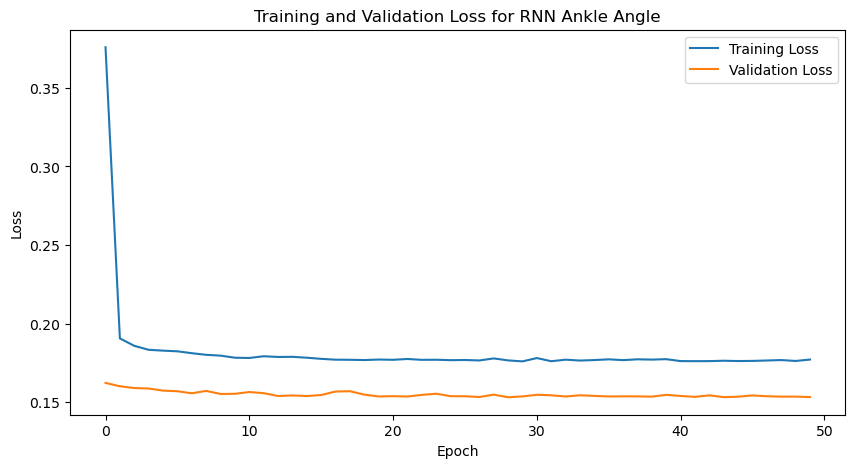

In [21]:
train_loss = model.history['loss']
val_loss = model.history['val_loss']

# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss for RNN Ankle Angle')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

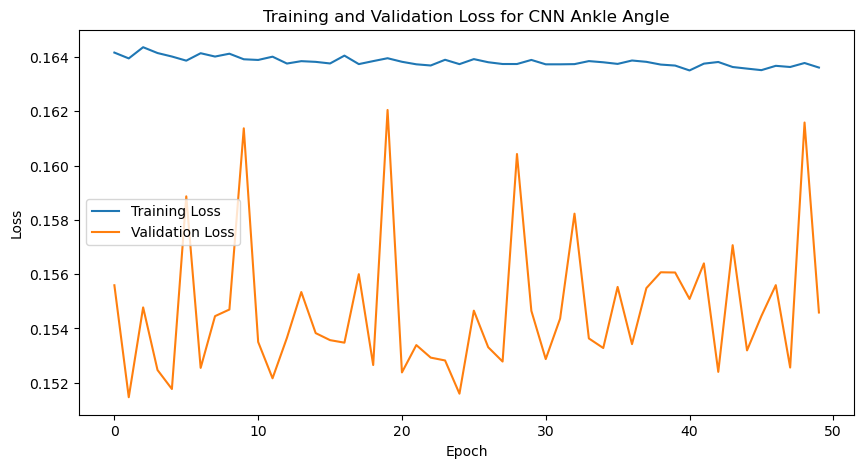

In [26]:
train_loss = fit.history['loss']
val_loss = fit.history['val_loss']

# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss for CNN Ankle Angle')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()